# Проектная работа по модулю “Математика и статистика в Python”

In [18]:
import numpy as np
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import io
import requests
import seaborn as sns
import statistics
import traceback
%matplotlib inline

**1.Загрузить файл hr.csv.**

In [3]:
data=pd.read_csv('HR.csv')
data.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [4]:
data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
import traceback
column_stat={}
column_data=['satisfaction_level',
             'last_evaluation',
             'number_project',
             'average_montly_hours',
             'time_spend_company',
             'Work_accident',
             'left',
             'promotion_last_5years',
             'sales',
             'salary'
            ]
index_data=[]
mean_data=[]
median_data=[]
mode_data=[]
max_data=[]
min_data=[]
pstdev_data=[]
for name in column_data:
    if data[name].dtypes!=object:
        index_data.append(name)
        mean_data.append(statistics.mean(data[name]))
        median_data.append(statistics.median(data[name]))
        try:
            mode_data.append(statistics.mode(data[name]))
        except:
            check={}
            for i in data[name]:
                if i not in check:
                    check[i] = 1
                else:
                    check[i] += 1
            maxp = 0
            mode_duration = None
            for k, v in check.items():
                if maxp < v:
                    maxp = v
                    mode_duration = k
            mode_data.append(mode_duration)
        max_data.append(max(data[name]))
        min_data.append(min(data[name]))
        pstdev_data.append(statistics.pstdev(data[name]))
column_stat.setdefault('mean', mean_data)
column_stat.setdefault('median', median_data)
column_stat.setdefault('mode', mode_data)
column_stat.setdefault('max', max_data)
column_stat.setdefault('min', min_data)
column_stat.setdefault('pstdev', pstdev_data)
print(column_stat)

{'mean': [0.6128335222348157, 0.7161017401160077, 3.80305353690246, 201.0503366891126, 3.498233215547703, 0.1446096406427095, 0.2380825388359224, 0.021268084538969265], 'median': [0.64, 0.72, 4, 200, 3, 0, 0, 0], 'mode': [0.1, 0.55, 4, 135, 3, 0, 0, 0], 'max': [1.0, 1.0, 7, 310, 10, 1, 1, 1], 'min': [0.09, 0.36, 2, 96, 2, 0, 0, 0], 'pstdev': [0.2486223626820733, 0.1711634045107436, 1.2325512654823438, 49.94143446256218, 1.4600875552715114, 0.3517068274513532, 0.42590990072709495, 0.14427665479561314]}


In [6]:
stat_frame=pd.DataFrame(column_stat, index=index_data)
stat_frame

mean  median    mode    max    min     pstdev
satisfaction_level       0.612834    0.64    0.10    1.0   0.09   0.248622
last_evaluation          0.716102    0.72    0.55    1.0   0.36   0.171163
number_project           3.803054    4.00    4.00    7.0   2.00   1.232551
average_montly_hours   201.050337  200.00  135.00  310.0  96.00  49.941434
time_spend_company       3.498233    3.00    3.00   10.0   2.00   1.460088
Work_accident            0.144610    0.00    0.00    1.0   0.00   0.351707
left                     0.238083    0.00    0.00    1.0   0.00   0.425910
promotion_last_5years    0.021268    0.00    0.00    1.0   0.00   0.144277

**3.Рассчитать и визуализировать корреляционную матрицу для переменных.**

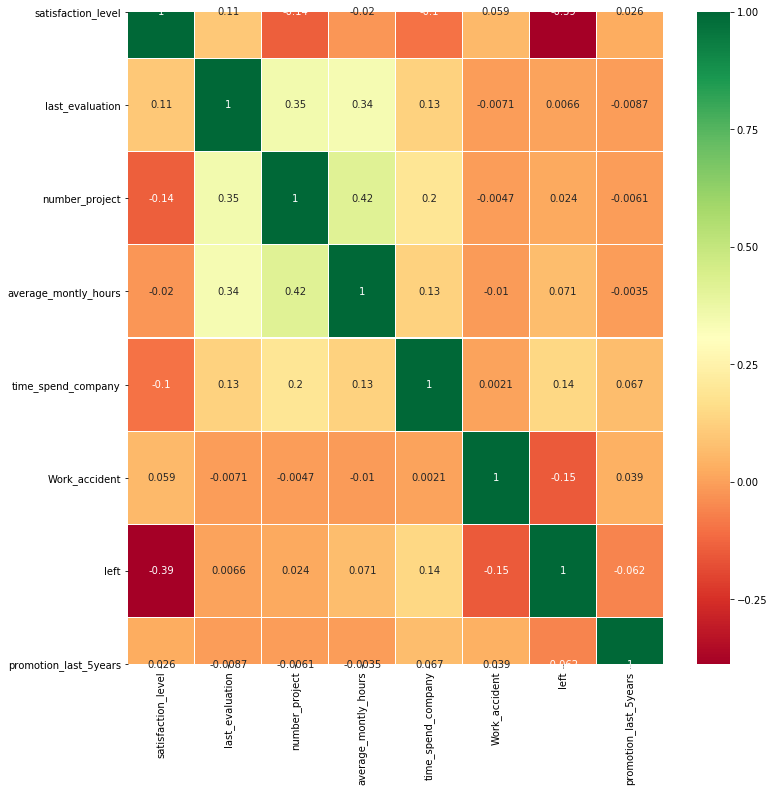

In [7]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**Вывод:** такие переменные как "Последняя оценка" и "Среднее количество часов в месяц" зависят от "Номера проекта" и имеею положительную коррляцию, а "Уровень удовлетворености" иммеет отрицательную корреляцию с "Сотрудниками, которые работают сейчас"

**4.Визуализировать несколько взаимосвязей между переменными.**

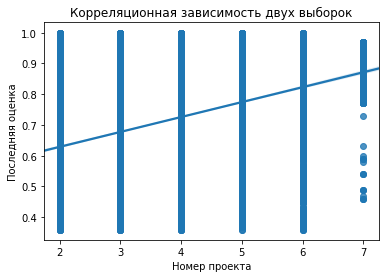

In [8]:
number_project = data['number_project']
last_evaluation = data['last_evaluation']
sns.regplot(x= number_project, y=last_evaluation, data=data, fit_reg=True)
plt.xlabel('Номер проекта')
plt.ylabel('Последняя оценка')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

**Вывод:** на проекте сотрудники №7 получают оценки более высокие

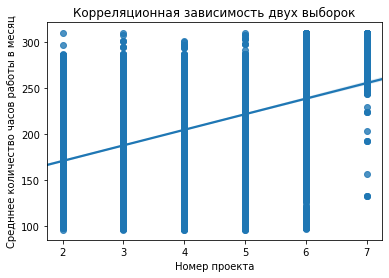

In [9]:
number_project = data['number_project']
average_montly_hours = data['average_montly_hours']
sns.regplot(x= number_project, y=average_montly_hours, data=data, fit_reg=True)
plt.xlabel('Номер проекта')
plt.ylabel('Средннее количество часов работы в месяц')
plt.title('Корреляционная зависимость двух выборок')
plt.grid(False)
plt.show()

**Вывод:** чем выше номер проекта тем требуется больше времени на работу

**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

In [47]:
satisfaction_level=data['satisfaction_level']
last_evaluation=data['last_evaluation']
stats.ttest_ind(satisfaction_level, last_evaluation)

Ttest_indResult(statistic=-41.89868154070206, pvalue=0.0)

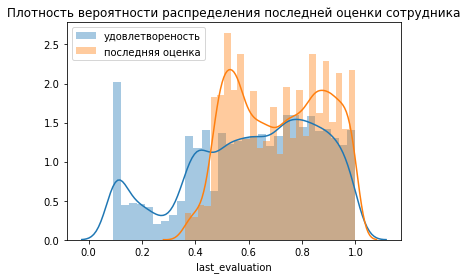

In [49]:
sns.distplot(satisfaction_level)
sns.distplot(last_evaluation)
plt.title('Плотность вероятности распределения последней оценки сотрудника')
plt.legend(['удовлетвореность', 'последняя оценка'])
plt.show()

**Вывод:** последняя оценка зависит от степени удовлетворености сотрудника

**6.Рассчитать сколько работников работает в каждом департаменте.**

In [27]:
def groupby_function(data):
    return data.satisfaction_level.count()

In [28]:
print('В департаментах работает : \n', data.groupby('sales').apply(groupby_function))

В департаментах работает : 
 sales
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
dtype: int64


**Вывод:** Больше всего сотрудников работало и работает в продажах

**7.Показать распределение сотрудников по зарплатам.**

In [29]:
def groupby_count(data):
    return data.satisfaction_level.count()

In [30]:
df=data.groupby('salary').apply(groupby_count)
df

salary
high      1237
low       7316
medium    6446
dtype: int64

In [31]:
df=sorted(df, reverse=True)

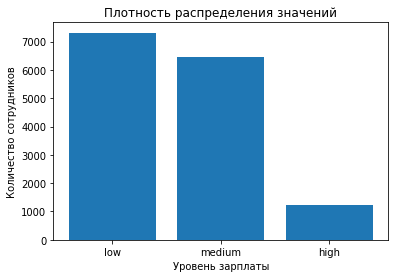

In [32]:
r=['low', 'medium' ,'high']
plt.bar(r, df)
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.title('Плотность распределения значений')
plt.show()

**Вывод:** в компании с нижнем уровнем дохода больше, чем со среднем доходом.

**8.Показать распределение сотрудников по зарплатам совместно с департаментами.**

In [33]:
sales_data=data.groupby(['sales','salary']).apply(groupby_count).reset_index()
sales_data.columns=['sales', 'salary', 'count']
sales_data

sales  salary  count
0            IT    high     83
1            IT     low    609
2            IT  medium    535
3         RandD    high     51
4         RandD     low    364
5         RandD  medium    372
6    accounting    high     74
7    accounting     low    358
8    accounting  medium    335
9            hr    high     45
10           hr     low    335
11           hr  medium    359
12   management    high    225
13   management     low    180
14   management  medium    225
15    marketing    high     80
16    marketing     low    402
17    marketing  medium    376
18  product_mng    high     68
19  product_mng     low    451
20  product_mng  medium    383
21        sales    high    269
22        sales     low   2099
23        sales  medium   1772
24      support    high    141
25      support     low   1146
26      support  medium    942
27    technical    high    201
28    technical     low   1372
29    technical  medium   1147

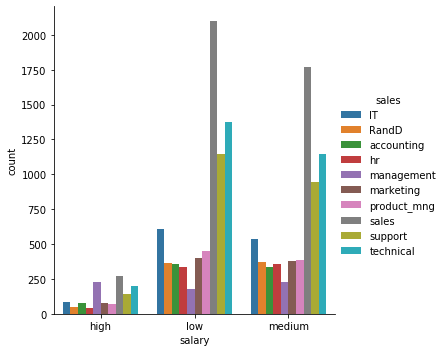

In [34]:
row=sales_data['salary']
f = sales_data['count']
sns.catplot(x='salary', y='count', hue='sales', kind='bar', data=sales_data)

**Вывод:** По департаментам некоторые департаменты выбиваются из общей статистики уровня доходов

**9.Сколько сотрудников покинули компанию.**

In [62]:
data.groupby('left').apply(groupby_count)

left
0    11428
1     3571
dtype: int64

**10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию.**

Проверка гипотизы, что увольняются люди с низкой степенью удовлетворености 

In [43]:
s_level_leave=data[data['left']==0]['satisfaction_level']
s_level_left=data[data['left']==1]['satisfaction_level']
stats.ttest_ind(s_level_leave, s_level_left)

Ttest_indResult(statistic=51.61280155890104, pvalue=0.0)

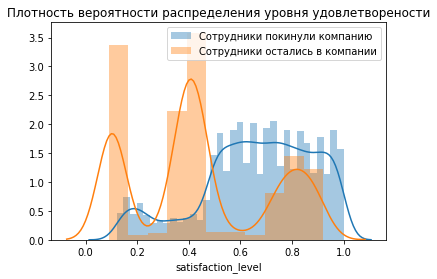

In [44]:
sns.distplot(s_level_leave)
sns.distplot(s_level_left)
plt.title('Плотность вероятности распределения уровня удовлетворености')
plt.legend(['Сотрудники покинули компанию', 'Сотрудники остались в компании'])
plt.show()

**Вывод:** степень удовлетворености сотрудников не влияет на их решение покинуть компанию

Проверка гипотизы, что увольняются люди с низкой последней оценки

In [45]:
l_ev_leave=data[data['left']==0]['last_evaluation']
l_ev_left=data[data['left']==1]['last_evaluation']
stats.ttest_ind(l_ev_leave, l_ev_left)

Ttest_indResult(statistic=-0.8042416167796329, pvalue=0.4212701963735056)

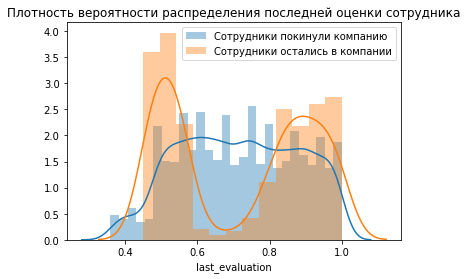

In [46]:
sns.distplot(l_ev_leave)
sns.distplot(l_ev_left)
plt.title('Плотность вероятности распределения последней оценки сотрудника')
plt.legend(['Сотрудники покинули компанию', 'Сотрудники остались в компании'])
plt.show()

**Вывод:** последняя оценка не влияет на решение сотрудника покинуть компанию